# CCM Final Project
#### Baysian Modeling of Orientation WM prior

### Content
1. Load and Sort data
2. Prior Model Simulate
3. Fit Prior Model
4. Validation of Prior Model (Recover the params from the simulated data)

### 1. Load and Sort Data

In [81]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [82]:
curr_dif = os.getcwd()
data_dir = os.path.abspath(os.path.join(curr_dif, '..\\..\\'))
os.listdir(data_dir)

['.Rhistory',
 '.Rproj.user',
 'CCM_finalProject',
 'CCM_Final_23Spring.Rproj',
 'data',
 'data_beh.csv',
 'figures',
 'scripts']

In [83]:
data_path = os.path.join(data_dir,'data_beh.csv')
data = pd.read_csv(data_path,sep=',')

data.head()

,subjID,run,trial,phase,oriRef,oriJitt,oriFinal,oriRespInit,oriRespFinal,error,points,rt,outoftime,iti
0,1,1,1,9,2,-9,36,63,62,-26,48,2.609021,NaN,0.2
1,1,1,2,3,1,-9,171,85,165,6,88,3.047162,NaN,0.2
2,1,1,3,4,2,-1,44,58,53,-9,82,2.500657,NaN,0.2
3,1,1,4,1,3,6,96,12,99,-3,94,3.697208,NaN,0.2
4,1,1,5,3,4,3,138,43,143,-5,90,3.665645,NaN,0.2


In [84]:
data_df = pd.DataFrame(data)
flag = data_df['outoftime']!=1
print(sum(flag))
data_clean = data_df[flag]
data_clean

2319


,subjID,run,trial,phase,oriRef,oriJitt,oriFinal,oriRespInit,oriRespFinal,error,points,rt,outoftime,iti
0,1,1,1,9,2,-9,36,63,62,-26,48,2.609021,NaN,0.2
1,1,1,2,3,1,-9,171,85,165,6,88,3.047162,NaN,0.2
2,1,1,3,4,2,-1,44,58,53,-9,82,2.500657,NaN,0.2
3,1,1,4,1,3,6,96,12,99,-3,94,3.697208,NaN,0.2
4,1,1,5,3,4,3,138,43,143,-5,90,3.665645,NaN,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,15,1,155,7,3,-1,89,93,88,1,98,2.375790,NaN,0.2
2395,15,1,156,1,3,0,90,18,91,-1,98,2.757365,NaN,0.2
2397,15,1,158,5,4,1,136,149,127,9,82,2.387765,NaN,0.2
2398,15,1,159,2,2,-6,39,20,46,-7,86,1.181797,NaN,0.2


In [85]:
data_ref1 = data_clean[data_clean['oriRef']==1 ]
data_ref2 = data_clean[data_clean['oriRef']==2 ]
data_ref3 = data_clean[data_clean['oriRef']==3 ]
data_ref4 = data_clean[data_clean['oriRef']==4 ]

#flip_flag = data_ref1['oriFinal'>=170]
#data_ref1['oriFinal'] = data_ref1[flip_flag,['oriFinal']]-180

In [86]:
data_ref2

,subjID,run,trial,phase,oriRef,oriJitt,oriFinal,oriRespInit,oriRespFinal,error,points,rt,outoftime,iti
0,1,1,1,9,2,-9,36,63,62,-26,48,2.609021,NaN,0.2
2,1,1,3,4,2,-1,44,58,53,-9,82,2.500657,NaN,0.2
8,1,1,9,1,2,8,53,112,57,-4,92,3.648202,NaN,0.2
10,1,1,11,9,2,7,52,80,69,-17,66,1.732261,NaN,0.2
11,1,1,12,2,2,-6,39,112,36,3,94,3.745060,NaN,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,15,1,135,8,2,8,53,18,57,-4,92,1.345367,NaN,0.2
2379,15,1,140,4,2,1,46,176,48,-2,96,1.399973,NaN,0.2
2380,15,1,141,2,2,3,48,87,48,0,100,1.466586,NaN,0.2
2385,15,1,146,6,2,-6,39,147,29,10,80,1.799879,NaN,0.2


### Prior Model Simulate

In [112]:
# Kay Error to notice: fixed
subject_data=data_ref2[data_ref2['subjID']==1]
# subject_data_all = data_clean

targ_loc = np.array(subject_data['oriFinal'])
real_response = np.array(subject_data['oriRespFinal'])

In [88]:
def prior_simulate_data(targ_loc,prior_mu,prior_std,likelihood_std):
    posterior = [];
    answers = [];
    xs = np.linspace(-90, 90, 361)
    for i in range(targ_loc.shape[0]):
        representation = norm.pdf(xs, loc=targ_loc[i], scale=likelihood_std)
        prior = norm.pdf(xs, loc=prior_mu, scale=prior_std)
        post = representation * prior
        post = post/sum(post) # normalize
        
        random_answer = np.random.choice(xs,p = post)
        answers.append(random_answer)
        posterior.append(post[round(random_answer)])
        #errors = answers-targ_loc
    return answers,posterior

In [100]:
# let's try to simulate a fake subj when refence is 2

prior_mu = 45
prior_std = 25

likelihood_std = 15

answers,posterior = prior_simulate_data(targ_loc,prior_mu,prior_std,likelihood_std)
# print(answers)
# print(posterior)

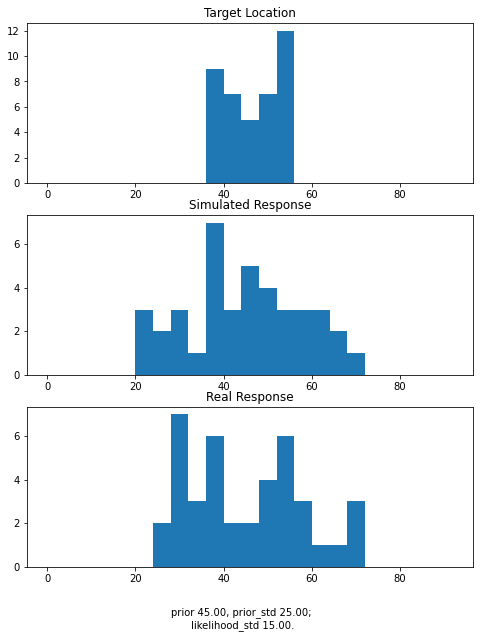

In [101]:
# Qingqing
# Plot the target location histogram

# Define the bin sizes
bin_targ = 4

# Create the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot the target location histogram
axs[0].hist(targ_loc, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[0].set_title('Target Location')

# Plot the response location histogram
axs[1].hist(answers, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[1].set_title('Simulated Response')

# Plot the response error histogram
axs[2].hist(real_response, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[2].set_title('Real Response')
# Set the x-label with the parameters
xtxt = f"prior {prior_mu:.2f}, prior_std {prior_std:.2f}; \nlikelihood_std {likelihood_std:.2f}."
fig.text(0.5, 0.04, xtxt, ha='center')

# Show the plot
plt.show()

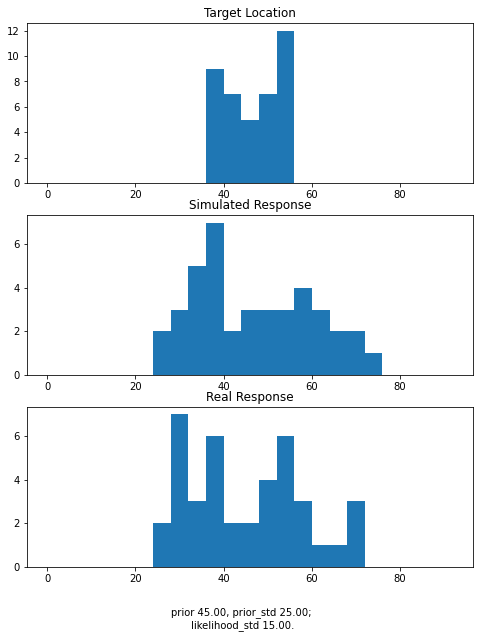

In [109]:
# Kay
# Also if there is no prior
def no_prior_simulate_data(targ_loc, likelihood_std):
    posterior = []
    answers = []
    xs = np.linspace(-90, 90, 361)
    
    # Uniform prior
    prior = np.ones_like(xs) / len(xs)
    
    for i in range(targ_loc.shape[0]):
        # Likelihood (representation) using a normal distribution
        representation = norm.pdf(xs, loc=targ_loc[i], scale=likelihood_std)
        
        # Posterior is the product of the likelihood and the uniform prior
        post = representation * prior
        post = post / sum(post)  # Normalize
        
        # Sample a random answer from the possible orientations
        random_answer = np.random.choice(xs, p=post)
        answers.append(random_answer)
        posterior.append(post[round(random_answer)])
        
    return answers, posterior

# let's try to simulate a fake subj when refence is 2
likelihood_std = 15

no_answers,no_posterior = no_prior_simulate_data(targ_loc,likelihood_std)
#print(no_answers)
#print(no_posterior)

# Plot the target location histogram

# Define the bin sizes
bin_targ = 4

# Create the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot the target location histogram
axs[0].hist(targ_loc, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[0].set_title('Target Location')

# Plot the response location histogram
axs[1].hist(no_answers, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[1].set_title('Simulated Response')

# Plot the response error histogram
axs[2].hist(real_response, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[2].set_title('Real Response')
# Set the x-label with the parameters
xtxt = f"prior {prior_mu:.2f}, prior_std {prior_std:.2f}; \nlikelihood_std {likelihood_std:.2f}."
fig.text(0.5, 0.04, xtxt, ha='center')

# Show the plot
plt.show()

### 3.Fit Prior Model

In [92]:
# Kay
def negative_log_likelihood(targ_loc, real_response, prior_mu, prior_std, likelihood_std):
    nll = 0
    #xs = np.arange(-45, 135, 0.01)
    xs = np.linspace(-90, 90, 361)

    for i in range(targ_loc.shape[0]):
        # Calculate the likelihood
        likelihood = norm.logpdf(real_response[i], loc=targ_loc[i], scale=likelihood_std)
        
        # Calculate the prior
        prior = norm.logpdf(real_response[i], loc=prior_mu, scale=prior_std)
        
        # Compute the log of the unnormalized posterior
        log_unnormalized_posterior = likelihood + prior
        
        # Compute the log of the normalization constant (log of P(S))
        log_normalization_constant = np.log(np.sum(np.exp(norm.logpdf(xs, loc=targ_loc[i], scale=likelihood_std) + norm.logpdf(xs, loc=prior_mu, scale=prior_std))))
        
        # Calculate the log-posterior
        log_posterior = log_unnormalized_posterior - log_normalization_constant
        
        # Update the negative log-likelihood
        nll -= log_posterior

    return nll

In [77]:
# Kay
# fmin() Warning: Maximum number of function evaluations has been exceeded.
from scipy.optimize import fmin

def wrapped_negative_log_likelihood(params):
    prior_std, likelihood_std = params
    return negative_log_likelihood(targ_loc, real_response, prior_mu, prior_std, likelihood_std)

# Initial guesses for prior_std and likelihood_std
initial_guess = np.array([10, 10])

# Minimize the negative log-likelihood using fmin
optimal_params = fmin(wrapped_negative_log_likelihood, initial_guess)

# Extract the estimated prior_std and likelihood_std
estimated_prior_std, estimated_likelihood_std = optimal_params
print("Estimated prior standard deviation:", estimated_prior_std)
print("Estimated likelihood standard deviation:", estimated_likelihood_std)

Estimated prior standard deviation: 63127254.39664165
Estimated likelihood standard deviation: 10.221201615315284


In [93]:
# Kay
#  Try minimize()
from scipy.optimize import minimize

# Define the objective function (wrapper for negative_log_likelihood)
def objective(params, targ_loc, real_response, prior_mu):
    prior_std, likelihood_std = params
    return negative_log_likelihood(targ_loc, real_response, prior_mu, prior_std, likelihood_std)

# Set initial guesses for prior_std and likelihood_std
init_params = [10, 10]  # [prior_std_guess, likelihood_std_guess]

# Set prior_mu (center of the distribution from which oriFinal is drawn)
prior_mu = 45

# Estimate parameters by minimizing the negative log-likelihood
result = minimize(objective, init_params, args=(targ_loc, real_response, prior_mu), bounds=((1e-5, None), (1e-5, None)))

# Extract the estimated parameters
estimated_prior_std, estimated_likelihood_std = result.x

print("Estimated prior standard deviation:", estimated_prior_std)
print("Estimated likelihood standard deviation:", estimated_likelihood_std)


Estimated prior standard deviation: 998.4581719596434
Estimated likelihood standard deviation: 10.221929972231097


In [104]:
# Kay
def negative_log_likelihood_no_prior(targ_loc, real_response, likelihood_std):
    nll = 0
    xs = np.linspace(-90, 90, 361)

    for i in range(targ_loc.shape[0]):
        # Calculate the likelihood
        likelihood = norm.logpdf(real_response[i], loc=targ_loc[i], scale=likelihood_std)
        
        # Compute the log of the unnormalized posterior
        # Since the prior is uniform, the log of the prior is a constant
        log_unnormalized_posterior = likelihood
        
        # Compute the log of the normalization constant (log of P(S))
        log_normalization_constant = np.log(np.sum(np.exp(norm.logpdf(xs, loc=targ_loc[i], scale=likelihood_std))))
        
        # Calculate the log-posterior
        log_posterior = log_unnormalized_posterior - log_normalization_constant
        
        # Update the negative log-likelihood
        nll -= log_posterior

    return nll

In [108]:
# Kay
def wrapped_negative_log_likelihood_no_prior(params):
    likelihood_std = params[0]
    return negative_log_likelihood_no_prior(targ_loc, real_response, likelihood_std)

from scipy.optimize import minimize

# Initial guess for likelihood_std
initial_guess_no_prior = np.array([10])

# Minimize the negative log-likelihood without prior using minimize
result_no_prior = minimize(wrapped_negative_log_likelihood_no_prior, initial_guess_no_prior)

# Extract the estimated likelihood_std
estimated_likelihood_std_no_prior = result_no_prior.x[0]

print(estimated_likelihood_std_no_prior)

10.221206984027946


In [189]:
targ_loc = np.random.normal(0, 10, ntrials)
targ_loc = np.round(targ_loc)
print(targ_loc)
true_ans = targ_loc + np.random.randint(-9, 10, len(targ_loc))
print(true_ans)

[ 15.  13. -20. -12. -11.   4.   6. -11.   8.  -3.   0.  -1.   6.  -1.
 -14.  -8.  -3.   4. -17.   7.   7.  11.   4. -15. -19.   4.   1.  -5.
  -9.  -7.   7.  22.  -9.  -1.  -5.  -8.  -1.   9.  13.  -7.]
[  9.  15. -23. -21.  -3.   1.   1. -17.  14.   1.   5.  -8.   5.   7.
  -5.  -1.  -9.   4. -14.  12.   1.   6.   8. -11. -23.   0.  -6.  -9.
 -10.   0.  14.  25. -14.  -8.  -6.  -9.  -5.   0.  16.   1.]


In [190]:
ntrials = 40
xs = np.linspace(-90, 90, 181)

prior = norm.pdf(xs, loc= 0, scale= 10)
prior = np.tile(prior[:, np.newaxis], (1, int(ntrials)))
prior_T = prior.T
representation = norm.pdf(xs.reshape(-1,1), loc=targ_loc, scale=5)
representation_T = representation.T

post_T = prior_T * representation_T

sum_post_T = np.sum(post_T, axis=1, keepdims=True)
post_T_norm = np.divide(post_T, sum_post_T)

nll_T = -np.log(post_T_norm)

nLL = []
for i in range(0,len(true_ans)):
    trial_true = (true_ans[i] + 90).astype(int)    
    trail_nll = nll_T[i]
    trail_nLL = trail_nll[trial_true]
    nLL.append(trail_nLL)
print(nLL)


[2.641804669981668, 2.9458046699816687, 3.641804669981667, 5.665804669981668, 3.257804669981668, 2.537804669981668, 2.777804669981668, 4.0978046699816675, 3.860804669981668, 2.705804669981669, 3.0418046699816683, 3.7128046699816686, 2.417804669981668, 3.937804669981669, 3.377804669981668, 3.1458046699816684, 3.5058046699816687, 2.4328046699816683, 2.420804669981668, 3.4408046699816683, 2.9458046699816682, 2.612804669981668, 2.992804669981668, 2.4418046699816682, 3.937804669981668, 2.672804669981668, 3.5728046699816676, 3.0418046699816688, 2.612804669981668, 3.200804669981668, 4.1808046699816686, 3.7858046699816676, 3.5728046699816676, 3.7128046699816686, 2.5168046699816684, 2.585804669981669, 2.8578046699816686, 3.7128046699816686, 3.200804669981669, 3.5058046699816687]


In [197]:
likelihood_std = 5
norm.pdf(xs.reshape(1, -1), loc=targ_loc[:, np.newaxis], scale=likelihood_std) == representation_T



array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [68]:
# Qingqing
def prior_cal_nll(targ_loc,true_answer, params):
    ntrials = targ_loc.shape[0]
    
    xs = np.arange(-45, 135, 0.01)
    prior_mu = params[0]
    prior_std = params[1]
    likelihood_std = params[2]
    
    # can create prior outside of the loop because doesn't change
    prior = norm.pdf(xs, loc=prior_mu, scale=prior_std)
    
    prior = np.tile(prior[:, np.newaxis], (1, int(ntrials)))

    # representation is also easy to do without a loop
    representation = norm.pdf(xs.reshape(-1,1), loc=targ_loc, scale=likelihood_std)

    post = representation * prior
    post = post/np.sum(post, axis=1, keepdims=True)

    # this is the true answer
    xs_matrix = np.tile(xs, (ntrials,1))
    
    #true_answer = true_answer.values
    
    index = np.argmin(np.abs(xs_matrix - true_answer.reshape(-1,1)), axis=1) #find the closest one
    
    if len(index) != len(true_answer):
        raise ValueError('the num of llh is not the number of trial')

    col_post = post.flatten(order='F')
    col_probs = col_post[index]
    llh = np.sum(np.log(col_probs))
    nLL = -llh 

    return nLL

In [69]:
# Qingqing
nparams = 3
nsubjs = 15

prior_std_range = np.arange(1, 30, 2)
likelihood_std_range = np.arange(.1,10,.5);


allfits = np.empty((niters, nparams))
nLL_total = np.empty((len(prior_std_range),len(likelihood_std_range)))
prior_std_fit = np.empty((nsubjs))
likelihood_std_fit = np.empty((nsubjs))
the_nLL = np.empty((nsubjs))

for subj in range(nsubjs):
    subject_data =  pd.DataFrame(data_ref2[data_ref2['subjID']==subj+1])
        
    targ_loc = np.array(subject_data['oriFinal'])
    true_answer = np.array(subject_data['oriRespFinal'])
    print(subj)
    for prior_idx in range(len(prior_std_range)):
        for likelihood_idx in range(len(likelihood_std_range)):
            # remember to change the 45 into other prior mu based on the data set u r using
            nll=prior_cal_nll(targ_loc,true_answer,[45, prior_std_range[prior_idx],likelihood_std_range[likelihood_idx]])
            
            nLL_total[prior_idx,likelihood_idx] = nll
    
    the_nLL = np.min(nLL_total) # final fitted nll
    I = np.nanargmin(nLL_total)

    j_idx = np.ceil(I / len(prior_std_range)).astype(int)-1
    i_idx = I - (j_idx) * len(prior_std_range) - 1

    prior_std_fit[subj] = prior_std_range[i_idx] # final fitted prior std
    likelihood_std_fit[subj] = likelihood_std_range[j_idx] # final fitted likelihood std

NameError: name 'niters' is not defined

In [373]:
# Qingqing
prior_std_fit

array([ 7.,  7.,  7.,  7.,  7.,  7., 17., 17.,  7.,  7.,  7.,  7., 17.,
       17.,  7.])

In [374]:
# Qingqing
likelihood_std_fit

array([0.6, 0.6, 0.6, 4.6, 0.6, 0.6, 1.1, 1.1, 0.6, 0.6, 0.6, 2.6, 1.1,
       1.1, 0.6])

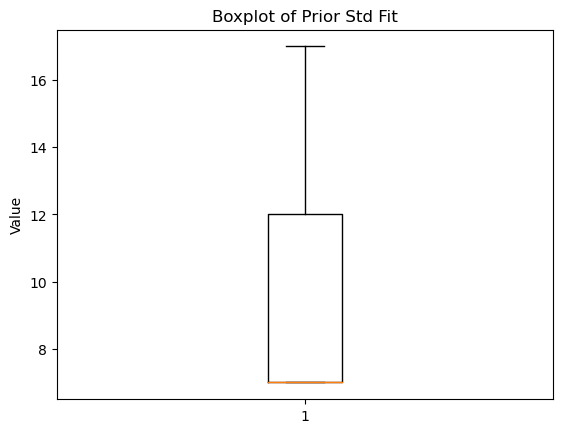

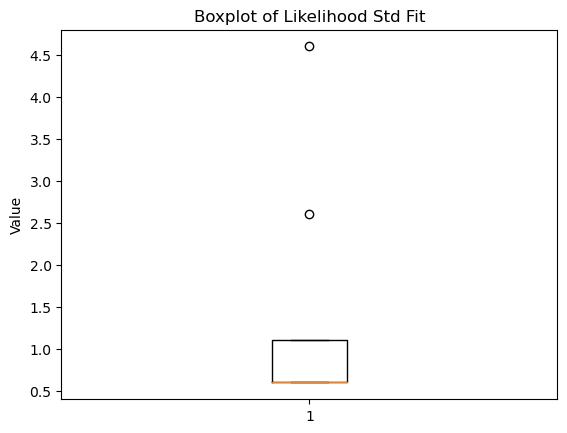

In [375]:
# Qingqing
import matplotlib.pyplot as plt

# create boxplot for prior_std_fit
fig1, ax1 = plt.subplots()
ax1.boxplot(prior_std_fit)
ax1.set_title('Boxplot of Prior Std Fit')
ax1.set_ylabel('Value')

# create boxplot for likelihood_std_fit
fig2, ax2 = plt.subplots()
ax2.boxplot(likelihood_std_fit)
ax2.set_title('Boxplot of Likelihood Std Fit')
ax2.set_ylabel('Value')

plt.show()


#### It's not working now (fmin)
#### I tried to use fmin but the targ_loc i pass in was 40 by 1 after pass in it became 3 by 1 werid.

In [ ]:
# Qingqing
from scipy.optimize import fmin

options = {'ftol': 1e-8, 'disp': False}
nparams = 3
pmin = np.ones(nparams) * 1
pmax = np.ones(nparams) * 50
nsubjs = 15
niters = 1
allfits = np.empty((niters, nparams))
nll = np.empty((niters, 1))
best_params = np.empty((nsubjs, nparams))
min_nll = np.empty((nsubjs, 1))

for subj in range(nsubjs):
    subject_data =  pd.DataFrame(data_ref2[data_ref2['subjID']==subj+1])
    targ_loc = np.array(subject_data['oriFinal'])
    true_answer = np.array(subject_data['oriRespFinal'])
    
    print(targ_loc)
    
    init = np.random.uniform(pmin, pmax, nparams)
    # randomly initialize the starting point
    
    #nll=prior_cal_nll(subject_data, init)    
    #print(nll)
    allfits[iter, :], nll[iter] = fmin(prior_cal_nll, init, args=([targ_loc],[true_answer],), maxiter=500, full_output=True, disp=False)
    # returns the best fit parameters and their values
    
    # do all of that niters times, then pick the best ones
    idx = np.argmin(nll)
    min_nll[subj, :] = nll[idx]
    best_params[subj, :] = allfits[idx, :]
    #print(min_nll[subj,:])
    #print(best_params[subj,:])


### 4. Validation of Prior Model (Recover the params from the simulated data)

In [384]:
prior_std_range = np.arange(1, 30, 2)
likelihood_std_range = np.arange(.1,10,.5);

allfits = np.empty((niters, nparams))
nLL_retotal = np.empty((len(prior_std_range),len(likelihood_std_range)))
prior_std_refit = np.empty((nsubjs))
likelihood_std_refit = np.empty((nsubjs))
the_renLL = np.empty((nsubjs))

for subj in range(nsubjs):
    subject_data =  pd.DataFrame(data_ref2[data_ref2['subjID']==subj+1])
        
    targ_loc = np.array(subject_data['oriFinal'])
    true_answer = np.array(subject_data['oriRespFinal'])
    print(subj)
    
    prior_mu = 45
    prior_std = prior_std_fit[subj]

    likelihood_std = likelihood_std_fit[subj]

    simu_answers,posterior = prior_simulate_data(targ_loc,prior_mu,prior_std,likelihood_std)
    simu_answers = np.array(simu_answers)
    
    for prior_idx in range(len(prior_std_range)):
        for likelihood_idx in range(len(likelihood_std_range)):
            # remember to change the 45 into other prior mu based on the data set u r using
            nll=prior_cal_nll(targ_loc,simu_answers,[45, prior_std_range[prior_idx],likelihood_std_range[likelihood_idx]])
            
            nLL_retotal[prior_idx,likelihood_idx] = nll
    
    the_renLL[subj] = np.min(nLL_retotal) # final fitted nll
    I = np.nanargmin(nLL_retotal)

    j_idx = np.ceil(I / len(prior_std_range)).astype(int)-1
    i_idx = I - (j_idx) * len(prior_std_range) - 1

    prior_std_refit[subj] = prior_std_range[i_idx]  # refitted prior std
    likelihood_std_refit[subj] = likelihood_std_range[j_idx] # refitted likelihood std

0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19148\3691053948.py:18: RuntimeWarning: invalid value encountered in divide
  post = post/np.sum(post, axis=1, keepdims=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19148\3691053948.py:32: RuntimeWarning: divide by zero encountered in log
  llh = np.sum(np.log(col_probs))


1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [385]:
correlation_data = np.corrcoef(true_answer, simu_answers)[0,1]
correlation_likelihood = np.corrcoef(likelihood_std_refit, likelihood_std_fit)[0,1]
correlation_prior = np.corrcoef(prior_std_fit, prior_std_refit)[0,1]

print([correlation_data, correlation_likelihood, correlation_prior])


[0.6879474780552982, 0.08537792937171511, 0.004236147413513745]


In [386]:
likelihood_std_refit

array([0.6, 0.6, 0.6, 1.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.1, 0.6, 0.1, 0.1,
       8.6, 0.6])

In [387]:
likelihood_std_fit

array([0.6, 0.6, 0.6, 4.6, 0.6, 0.6, 1.1, 1.1, 0.6, 0.6, 0.6, 2.6, 1.1,
       1.1, 0.6])

In [388]:
prior_std_refit

array([ 7.,  3.,  7., 27.,  3.,  7.,  7.,  7.,  7., 29.,  7., 27., 27.,
        7.,  7.])

In [389]:
prior_std_fit

array([ 7.,  7.,  7.,  7.,  7.,  7., 17., 17.,  7.,  7.,  7.,  7., 17.,
       17.,  7.])

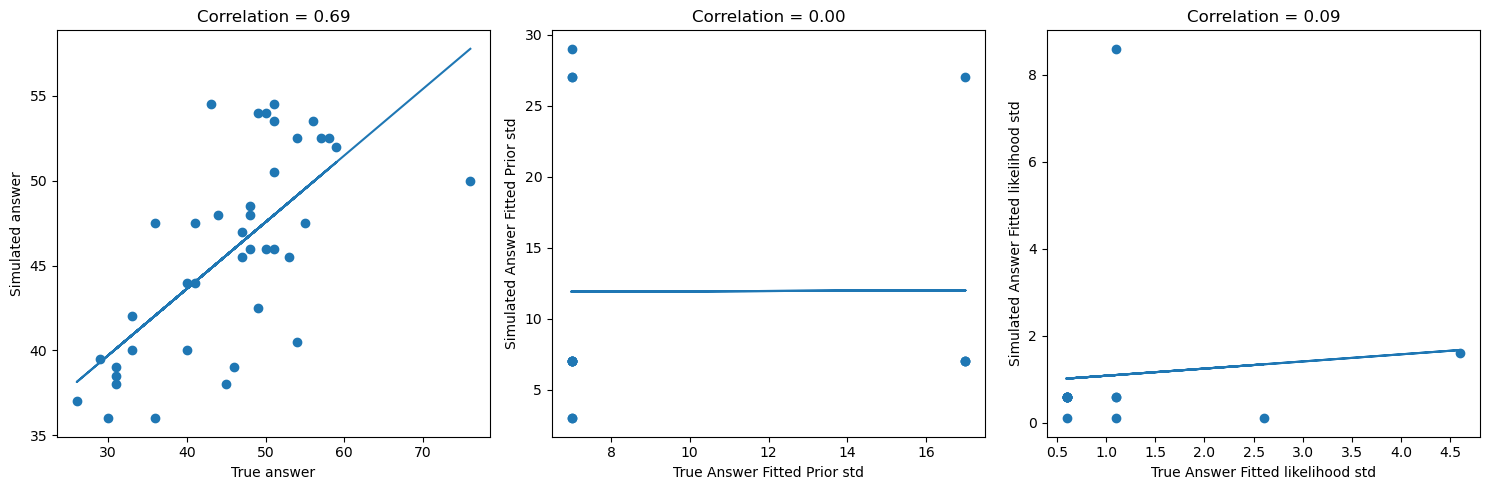

In [390]:
# Plot the real data, simulated data

# Draw scatter plots and lines
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# True answer and prior fit
axs[0].scatter(true_answer, simu_answers)
m, b = np.polyfit(true_answer, simu_answers, 1)
axs[0].plot(true_answer, m*true_answer + b)
axs[0].set_xlabel('True answer')
axs[0].set_ylabel('Simulated answer')
axs[0].set_title('Correlation = {:.2f}'.format(correlation_data))


#Plot the real data fitted params, and simulated data fitted params

# True and simulated data fitted prior
axs[1].scatter(prior_std_fit, prior_std_refit)
m, b = np.polyfit(prior_std_fit, prior_std_refit, 1)
axs[1].plot(prior_std_fit, m*prior_std_fit + b)
axs[1].set_xlabel('True Answer Fitted Prior std')
axs[1].set_ylabel('Simulated Answer Fitted Prior std')
axs[1].set_title('Correlation = {:.2f}'.format(correlation_prior))

# True and simulated data fitted likelihood
axs[2].scatter(likelihood_std_fit, likelihood_std_refit)
m, b = np.polyfit(likelihood_std_fit, likelihood_std_refit, 1)
axs[2].plot(likelihood_std_fit, m*likelihood_std_fit + b)
axs[2].set_xlabel('True Answer Fitted likelihood std')
axs[2].set_ylabel('Simulated Answer Fitted likelihood std')
axs[2].set_title('Correlation = {:.2f}'.format(correlation_likelihood))

plt.tight_layout()
plt.show()

Model validation 不太好，我感觉可能是simulate有问题，simulate的时候算完posterior之后，我是按那个pdf的频率随机再抽一个数，（另一种选择是直接选posterior最大值对应的点，但那个的simulate结果error都特别小..）或者可能是fit的时候gride search每一步比较大，精确性不高，但现有的计算已经很耗时间了...